# 🚀 ЕДИНЫЙ БЛОК КОДА ДЛЯ ПРЕОБРАЗОВАНИЯ ТАЙМ-ФРЕЙМОВ

**Запустите ячейку ниже, чтобы получить все преобразованные данные сразу!**

Этот блок кода:
- Загружает исходные данные из `df_btc.csv`
- Преобразует в 5 тайм-фреймов: 15M, 30M, 1H, 4H, 1D
- Сохраняет все в CSV файлы
- Создает визуализацию
- Показывает полную статистику

**Результат:** 5 готовых файлов для торговых стратегий!


🚀 ЗАПУСК ЕДИНОГО БЛОКА ПРЕОБРАЗОВАНИЯ ТАЙМ-ФРЕЙМОВ

📂 1. ЗАГРУЗКА ИСХОДНЫХ ДАННЫХ
-----------------------------------
✅ Данные загружены: 1,103,269 записей
📅 Период: 2024-01-22 00:12:53.990 - 2025-02-25 16:12:31.501

🔄 2. ПРЕОБРАЗОВАНИЕ ВСЕХ ТАЙМ-ФРЕЙМОВ
----------------------------------------
📊 Преобразуем 5 тайм-фреймов...

🔄 [1/5] Преобразование 15M...
   ✅ 15M: 38,465 баров (сжатие 28.7x)

🔄 [2/5] Преобразование 30M...
   ✅ 30M: 19,233 баров (сжатие 57.4x)

🔄 [3/5] Преобразование 1H...
   ✅ 1H: 9,617 баров (сжатие 114.7x)

🔄 [4/5] Преобразование 4H...
   ✅ 4H: 2,405 баров (сжатие 458.7x)

🔄 [5/5] Преобразование 1D...
   ✅ 1D: 401 баров (сжатие 2751.3x)

📊 3. СВОДКА РЕЗУЛЬТАТОВ
------------------------------
Исходные данные: 1,103,269 записей
Тайм-фрейм Баров      Сжатие   Файл
--------------------------------------------------
15M      38,465     28.7    x df_btc_15m.csv
30M      19,233     57.4    x df_btc_30m.csv
1H       9,617      114.7   x df_btc_1h.csv
4H       2,405      45

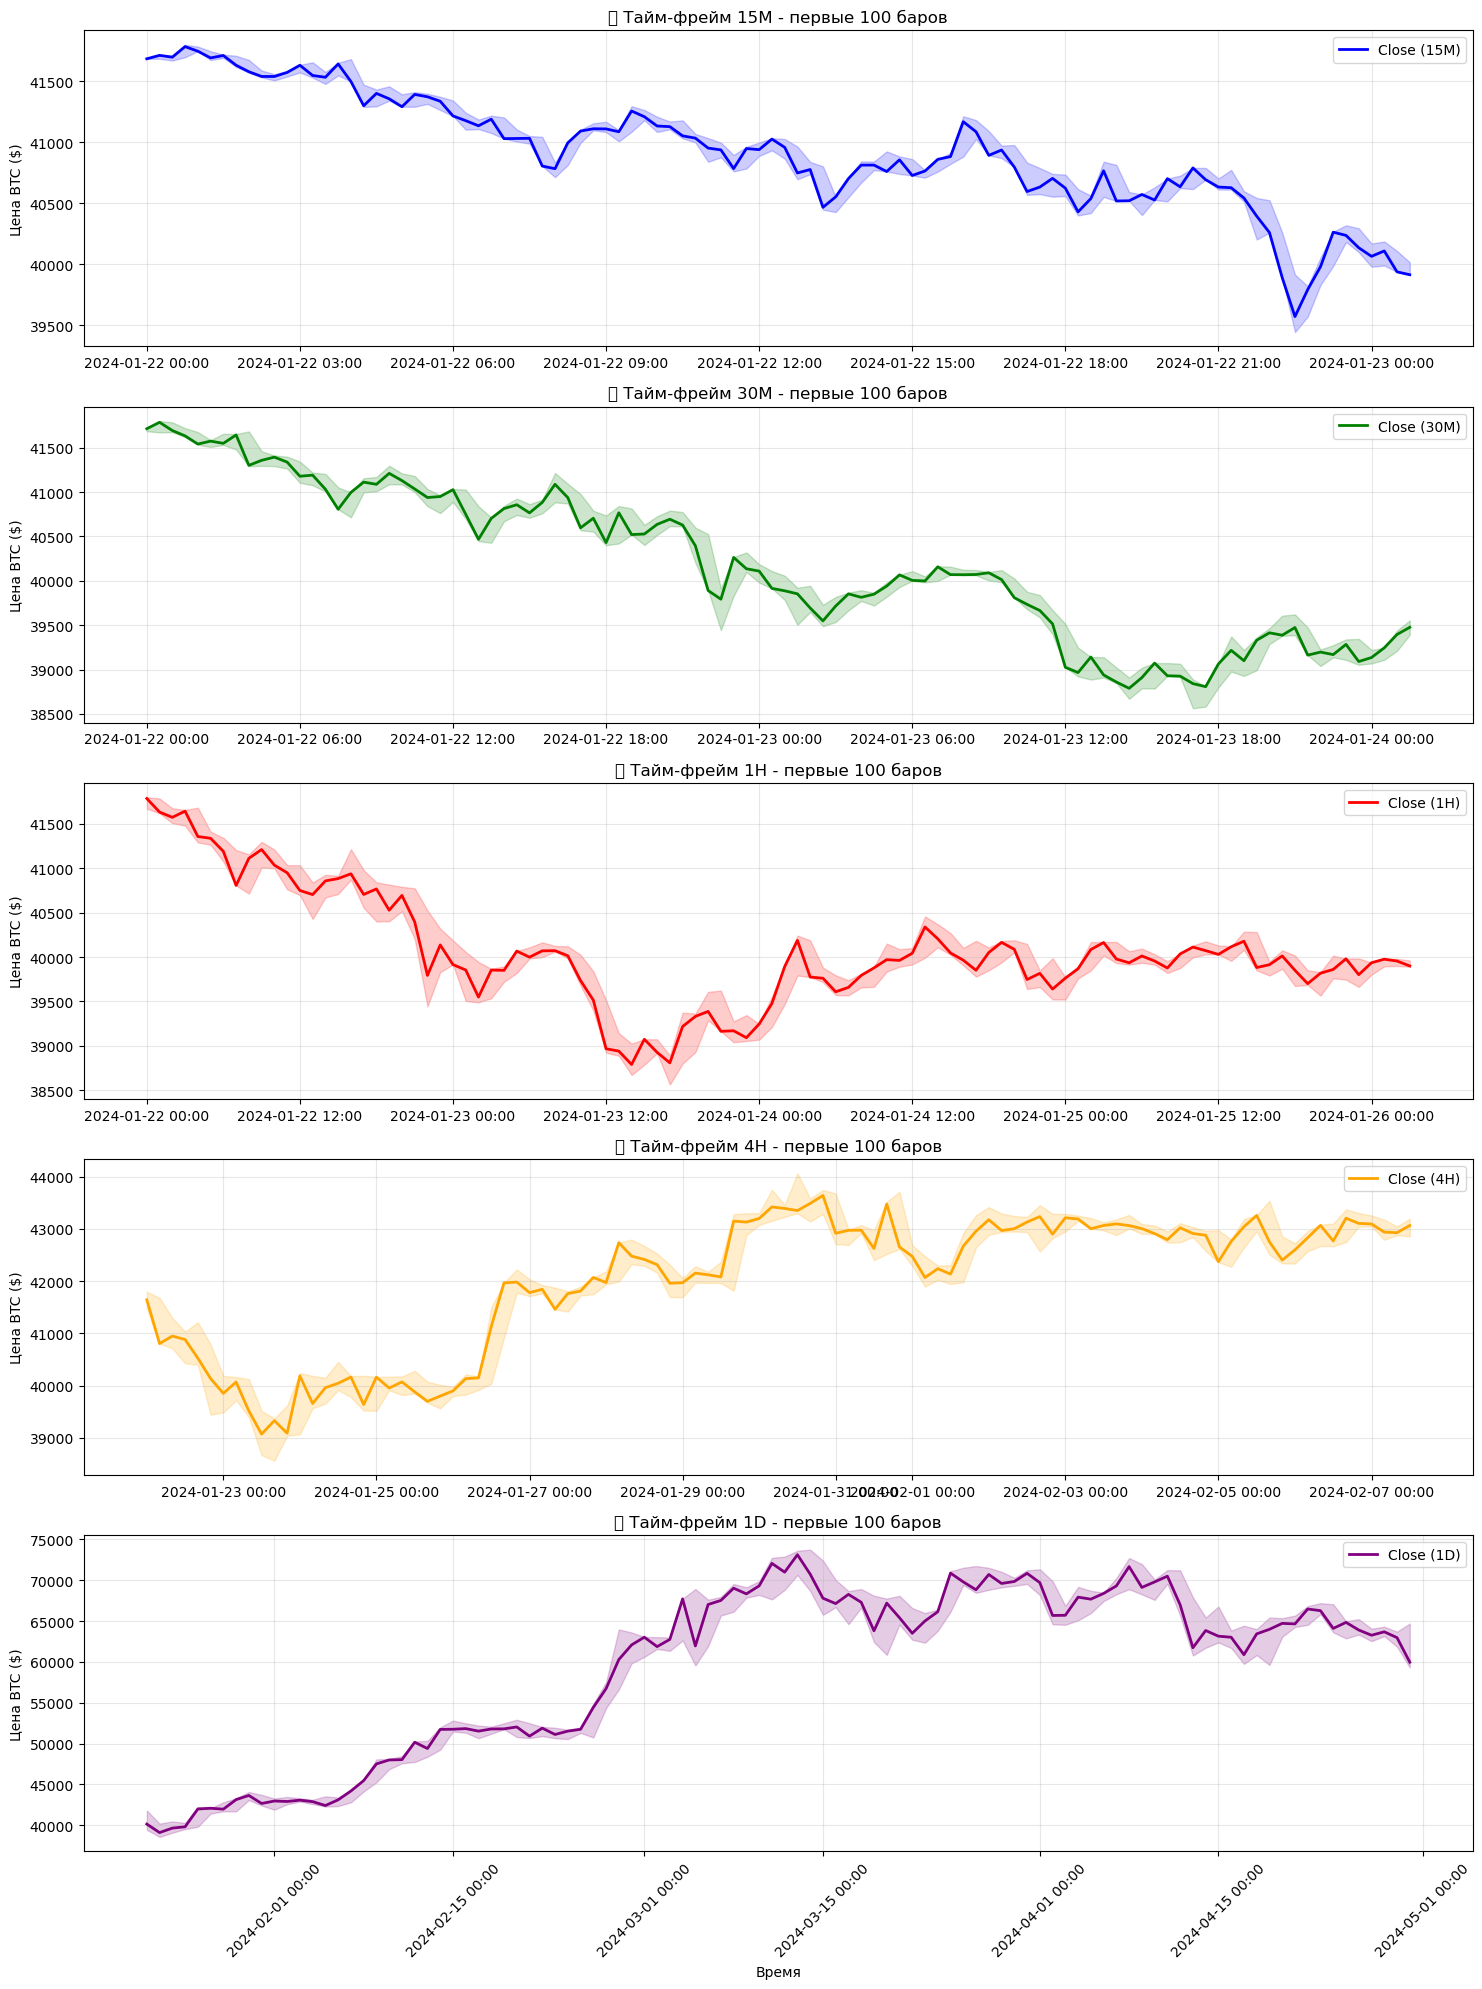


🔍 5. ПРОВЕРКА СОЗДАННЫХ ФАЙЛОВ
----------------------------------------
✅ df_btc_15m.csv: 38,465 записей
✅ df_btc_30m.csv: 19,233 записей
✅ df_btc_1h.csv: 9,617 записей
✅ df_btc_4h.csv: 2,405 записей
✅ df_btc_1d.csv: 401 записей

🎉 ИТОГОВЫЙ ОТЧЕТ
✅ Успешно создано: 5 файлов
📊 Исходные данные: 1,103,269 записей
🔄 Преобразовано тайм-фреймов: 5
📈 Создана визуализация: 5 графиков

📋 СОЗДАННЫЕ ФАЙЛЫ:
   1. df_btc_15m.csv
   2. df_btc_30m.csv
   3. df_btc_1h.csv
   4. df_btc_4h.csv
   5. df_btc_1d.csv

🎯 ГОТОВО! Все файлы готовы для использования в торговых стратегиях.
💡 Рекомендуется использовать df_btc_1h.csv для большинства стратегий.

📚 ИНСТРУКЦИЯ ПО ИСПОЛЬЗОВАНИЮ:
-----------------------------------
1. df_btc_15m.csv - 15-минутные данные (скальпинг)
2. df_btc_30m.csv - 30-минутные данные (внутридневная торговля)
3. df_btc_1h.csv - часовые данные (рекомендуется)
4. df_btc_4h.csv - 4-часовые данные (среднесрочная торговля)
5. df_btc_1d.csv - дневные данные (долгосрочная торговля)

🔧 Загр

In [1]:
# 🚀 ЕДИНЫЙ БЛОК КОДА ДЛЯ ПРЕОБРАЗОВАНИЯ ТАЙМ-ФРЕЙМОВ
# Запустите эту ячейку, чтобы получить все преобразованные данные сразу!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("🚀 ЗАПУСК ЕДИНОГО БЛОКА ПРЕОБРАЗОВАНИЯ ТАЙМ-ФРЕЙМОВ")
print("=" * 60)

# ==========================================
# 1. ЗАГРУЗКА ИСХОДНЫХ ДАННЫХ
# ==========================================
print("\n📂 1. ЗАГРУЗКА ИСХОДНЫХ ДАННЫХ")
print("-" * 35)

try:
    df_original = pd.read_csv('df_btc_for_ema.csv')
    print(f"✅ Данные загружены: {len(df_original):,} записей")
    print(f"📅 Период: {df_original['timestamps'].min()} - {df_original['timestamps'].max()}")
except Exception as e:
    print(f"❌ Ошибка загрузки: {e}")
    exit()

# ==========================================
# 2. ФУНКЦИЯ ПРЕОБРАЗОВАНИЯ
# ==========================================
def convert_to_timeframe(df, timeframe='1H', price_column='btc_price', timestamp_column='timestamps'):
    """Универсальная функция преобразования тайм-фрейма"""
    
    timeframe_map = {
        '1M': '1T', '5M': '5T', '15M': '15T', '30M': '30T',
        '1H': '1H', '4H': '4H', '1D': '1D', '1W': '1W'
    }
    
    if timeframe not in timeframe_map:
        raise ValueError(f"Неподдерживаемый тайм-фрейм: {timeframe}")
    
    # Преобразование
    df_copy = df.copy()
    df_copy[timestamp_column] = pd.to_datetime(df_copy[timestamp_column])
    df_copy.set_index(timestamp_column, inplace=True)
    df_copy.sort_index(inplace=True)
    
    # Ресемплинг
    resampled_data = df_copy[price_column].resample(timeframe_map[timeframe]).agg({
        'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last'
    }).dropna()
    
    return resampled_data

# ==========================================
# 3. ПРЕОБРАЗОВАНИЕ ВСЕХ ТАЙМ-ФРЕЙМОВ
# ==========================================
print("\n🔄 2. ПРЕОБРАЗОВАНИЕ ВСЕХ ТАЙМ-ФРЕЙМОВ")
print("-" * 40)

# Список тайм-фреймов для преобразования
timeframes = ['15M', '30M', '1H', '4H', '1D']
results = {}
saved_files = []

print(f"📊 Преобразуем {len(timeframes)} тайм-фреймов...")

for i, tf in enumerate(timeframes, 1):
    print(f"\n🔄 [{i}/{len(timeframes)}] Преобразование {tf}...")
    
    try:
        # Преобразуем данные
        converted_data = convert_to_timeframe(df_original, tf)
        results[tf] = converted_data
        
        # Сохраняем в файл
        filename = f'df_btc_{tf.lower()}.csv'
        converted_data.to_csv(filename)
        saved_files.append(filename)
        
        # Статистика
        compression = len(df_original) / len(converted_data)
        print(f"   ✅ {tf}: {len(converted_data):,} баров (сжатие {compression:.1f}x)")
        
    except Exception as e:
        print(f"   ❌ Ошибка в {tf}: {e}")

# ==========================================
# 4. СВОДКА РЕЗУЛЬТАТОВ
# ==========================================
print(f"\n📊 3. СВОДКА РЕЗУЛЬТАТОВ")
print("-" * 30)

print(f"Исходные данные: {len(df_original):,} записей")
print(f"{'Тайм-фрейм':<8} {'Баров':<10} {'Сжатие':<8} {'Файл'}")
print("-" * 50)

for tf, data in results.items():
    compression = len(df_original) / len(data)
    filename = f'df_btc_{tf.lower()}.csv'
    print(f"{tf:<8} {len(data):<10,} {compression:<8.1f}x {filename}")

# ==========================================
# 5. ВИЗУАЛИЗАЦИЯ
# ==========================================
print(f"\n📈 4. СОЗДАНИЕ ВИЗУАЛИЗАЦИИ")
print("-" * 35)

# Создаем сравнительный график
fig, axes = plt.subplots(len(results), 1, figsize=(15, 4*len(results)))
if len(results) == 1:
    axes = [axes]

colors = ['blue', 'green', 'red', 'orange', 'purple']

for i, (tf, data) in enumerate(results.items()):
    sample_data = data.head(100)  # Первые 100 записей
    
    axes[i].plot(sample_data.index, sample_data['close'], 
                linewidth=2, color=colors[i % len(colors)], label=f'Close ({tf})')
    axes[i].fill_between(sample_data.index, sample_data['low'], sample_data['high'], 
                        alpha=0.2, color=colors[i % len(colors)])
    
    axes[i].set_title(f'📊 Тайм-фрейм {tf} - первые 100 баров', fontsize=12)
    axes[i].set_ylabel('Цена BTC ($)')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    
    if i == len(results) - 1:
        axes[i].set_xlabel('Время')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==========================================
# 6. ПРОВЕРКА ФАЙЛОВ
# ==========================================
print(f"\n🔍 5. ПРОВЕРКА СОЗДАННЫХ ФАЙЛОВ")
print("-" * 40)

for filename in saved_files:
    try:
        df_check = pd.read_csv(filename, index_col=0, parse_dates=True)
        print(f"✅ {filename}: {df_check.shape[0]:,} записей")
    except Exception as e:
        print(f"❌ Ошибка проверки {filename}: {e}")

# ==========================================
# 7. ИТОГОВЫЙ ОТЧЕТ
# ==========================================
print(f"\n🎉 ИТОГОВЫЙ ОТЧЕТ")
print("=" * 20)
print(f"✅ Успешно создано: {len(saved_files)} файлов")
print(f"📊 Исходные данные: {len(df_original):,} записей")
print(f"🔄 Преобразовано тайм-фреймов: {len(results)}")
print(f"📈 Создана визуализация: {len(results)} графиков")

print(f"\n📋 СОЗДАННЫЕ ФАЙЛЫ:")
for i, filename in enumerate(saved_files, 1):
    print(f"   {i}. {filename}")

print(f"\n🎯 ГОТОВО! Все файлы готовы для использования в торговых стратегиях.")
print(f"💡 Рекомендуется использовать df_btc_1h.csv для большинства стратегий.")

# ==========================================
# 8. ИНСТРУКЦИЯ ПО ИСПОЛЬЗОВАНИЮ
# ==========================================
print(f"\n📚 ИНСТРУКЦИЯ ПО ИСПОЛЬЗОВАНИЮ:")
print("-" * 35)
print("1. df_btc_15m.csv - 15-минутные данные (скальпинг)")
print("2. df_btc_30m.csv - 30-минутные данные (внутридневная торговля)")
print("3. df_btc_1h.csv - часовые данные (рекомендуется)")
print("4. df_btc_4h.csv - 4-часовые данные (среднесрочная торговля)")
print("5. df_btc_1d.csv - дневные данные (долгосрочная торговля)")

print(f"\n🔧 Загрузка в коде:")
print("import pandas as pd")
print("df = pd.read_csv('df_btc_1h.csv', index_col=0, parse_dates=True)")
print("print(df.head())")

print(f"\n🎉 ВСЕ ГОТОВО!")
